<h2 id = "Setup"> Part 1: Setup </h2>

*   The raw churndata has been setup as a variable 'churndata', and we have imported it above.
*   We will rely on the data preprocessing from the KNN lab, which is captured in the file 'churndata_processed.csv'
*   First, import that file and examine its contents.
*   Output summary statistics and check variable data types
*   Using Seaborn, plot a heatmap of variable correlations


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")

In [3]:
data.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [4]:
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.43,0.40,0.0,0.00,0.25,0.75,1.0
multiple,7043.0,0.42,0.49,0.0,0.00,0.00,1.00,1.0
gb_mon,7043.0,0.24,0.24,0.0,0.04,0.20,0.32,1.0
security,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
backup,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
protection,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
support,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
unlimited,7043.0,0.67,0.47,0.0,0.00,1.00,1.00,1.0
contract,7043.0,0.38,0.42,0.0,0.00,0.00,1.00,1.0
paperless,7043.0,0.59,0.49,0.0,0.00,1.00,1.00,1.0


In [5]:
data.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
payment_Credit Card            int64
payment_Mailed Check           int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
dtype: object

<Axes: >

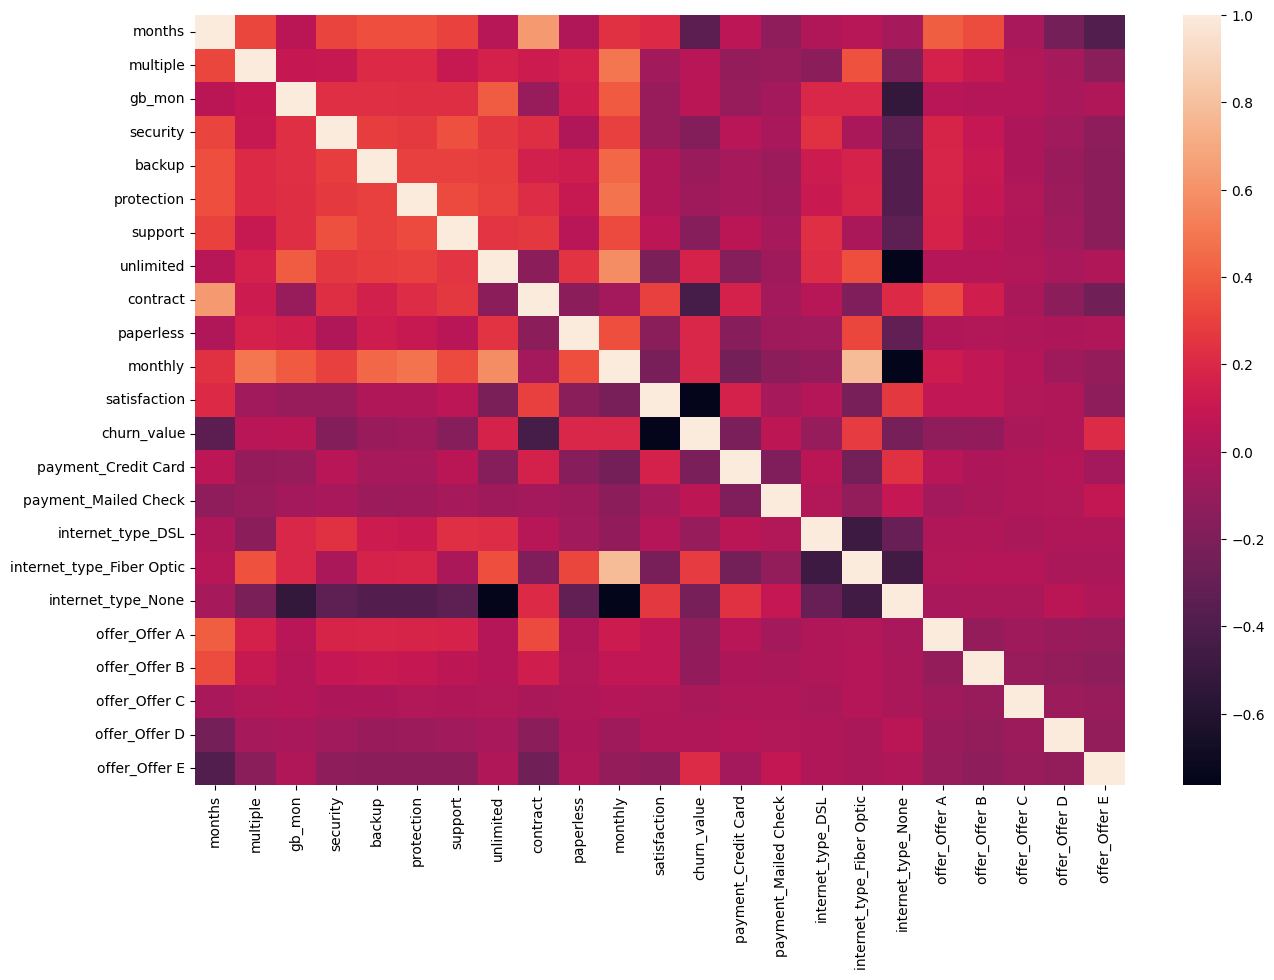

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr())

<h2 id="TargPreproc">Part 2: Examining the Target and Preprocessing</h2>

In this exercise, we will proceed as follows:

*   Examine distribution of the predicted variable (`churn_value`).
*   Split the data into train and test sets. Decide if a stratified split should be used or not based on the distribution.
*   Examine the distribution of the predictor variable in the train and test data.


In [7]:
data["churn_value"].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn_value, dtype: float64

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=1500, random_state=42)

In [9]:
X = data.drop("churn_value",axis="columns")
y = data["churn_value"]

train_index, test_index = next(splitter.split(X, y))

In [10]:
test_index

array([2016, 6357, 3005, ..., 2026,  602, 5644])

In [11]:
X_train = X.iloc[train_index]
y_train = y[train_index]

X_test = X.iloc[test_index]
y_test = y[test_index]

In [12]:
y_test.value_counts(normalize=True)

0    0.734667
1    0.265333
Name: churn_value, dtype: float64

<h2 id ="OOB">Part 3: Random Forest and Out-of-bag(oob) Error</h2>

In this exercise, we will:

*   Fit random forest models with a range of tree numbers and evaluate the out-of-bag error for each of these models.
*   Plot the resulting oob errors as a function of the number of trees.

*Note:* since the only thing changing is the number of trees, the `warm_start` flag can be used so that the model just adds more trees to the existing model each time. Use the `set_params` method to update the number of trees.


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

random_forest_scores ={}

random_forest_model = RandomForestClassifier(oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1)

for n_estimators in [i for i in range(1,500,50)]:
  random_forest_model.set_params(n_estimators = n_estimators )
  random_forest_model.fit(X_train,y_train)
  oob_error = 1 - random_forest_model.oob_score_
  random_forest_scores[n_estimators] = oob_error





/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Text(0.5, 1.0, 'No Of Trees Vs OOB Scores')

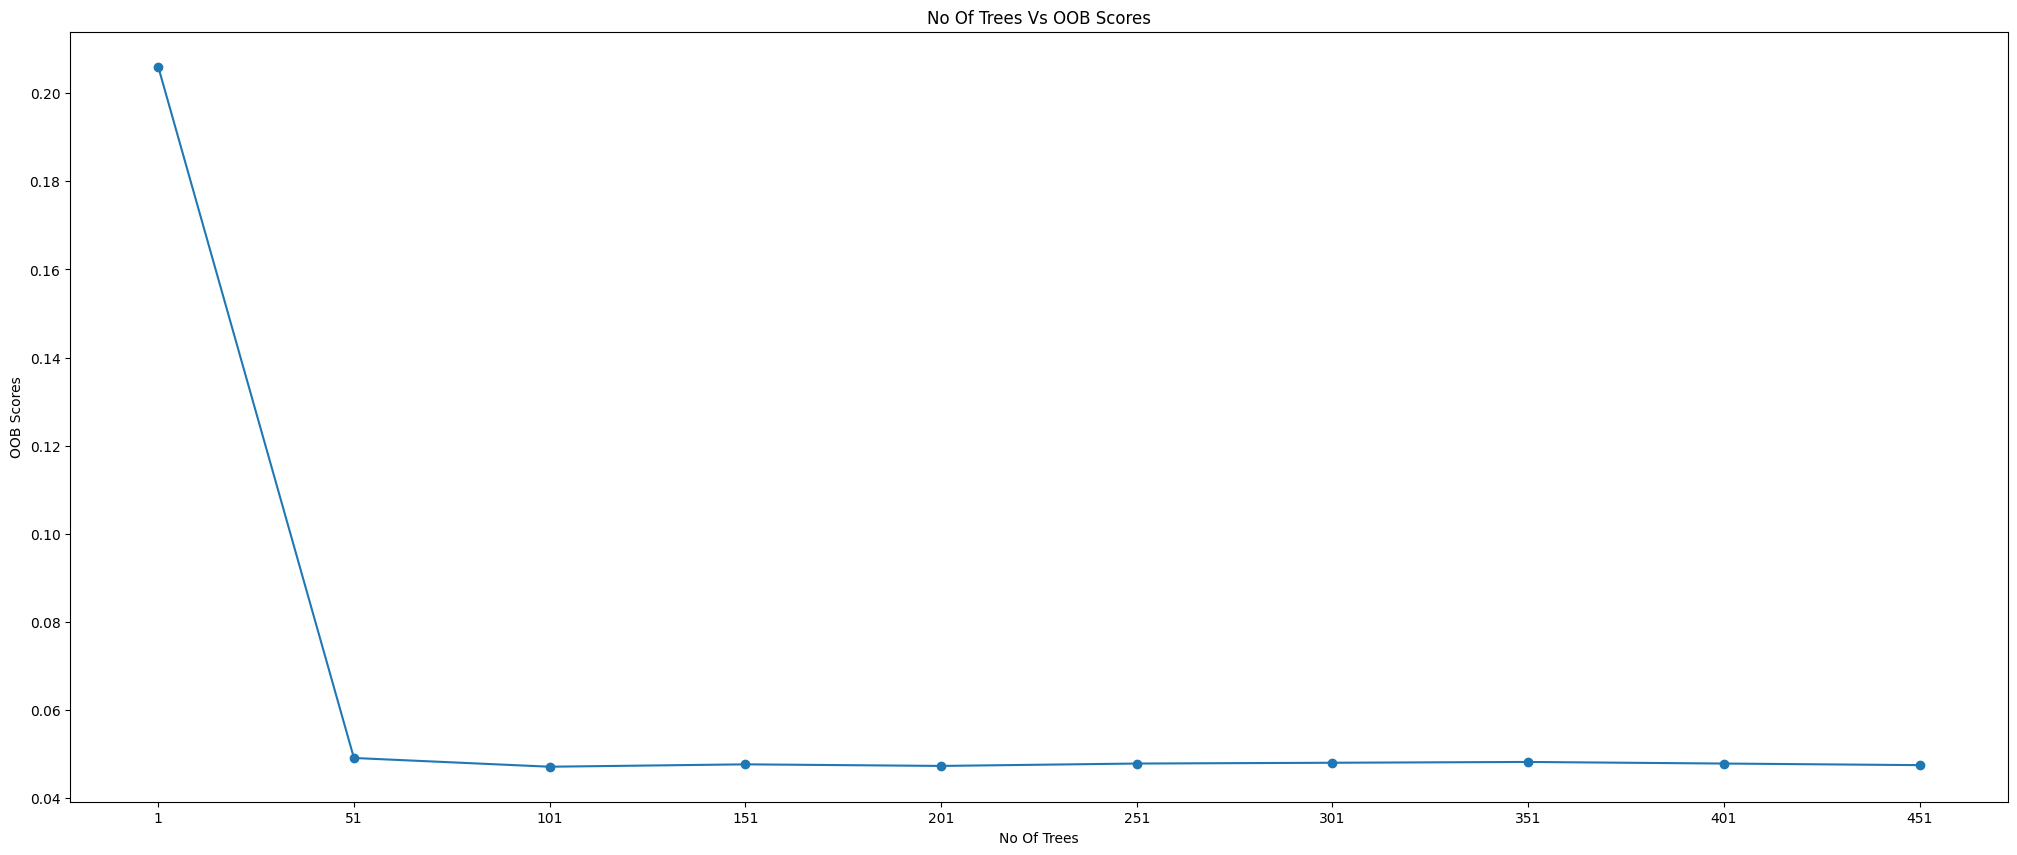

In [14]:
# Extract keys and values from the dictionary
random_keys = list(random_forest_scores.keys())
random_values = list(random_forest_scores.values())

plt.figure(figsize=(25, 10))
plt.xticks(random_keys)

plt.plot(random_keys, random_values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('No Of Trees')
plt.ylabel('OOB Scores')
plt.title('No Of Trees Vs OOB Scores')



<h2 id = "ExtraTrees">Part 4: Extra Trees</h2>

Our exercise:

*   Repeat question 3 using extra randomized trees (`ExtraTreesClassifier`). Note that the `bootstrap` parameter will have to be set to `True` for this model.
*   Compare the out-of-bag errors for the two different types of models.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Text(0.5, 1.0, 'No Of Trees Vs OOB Scores')

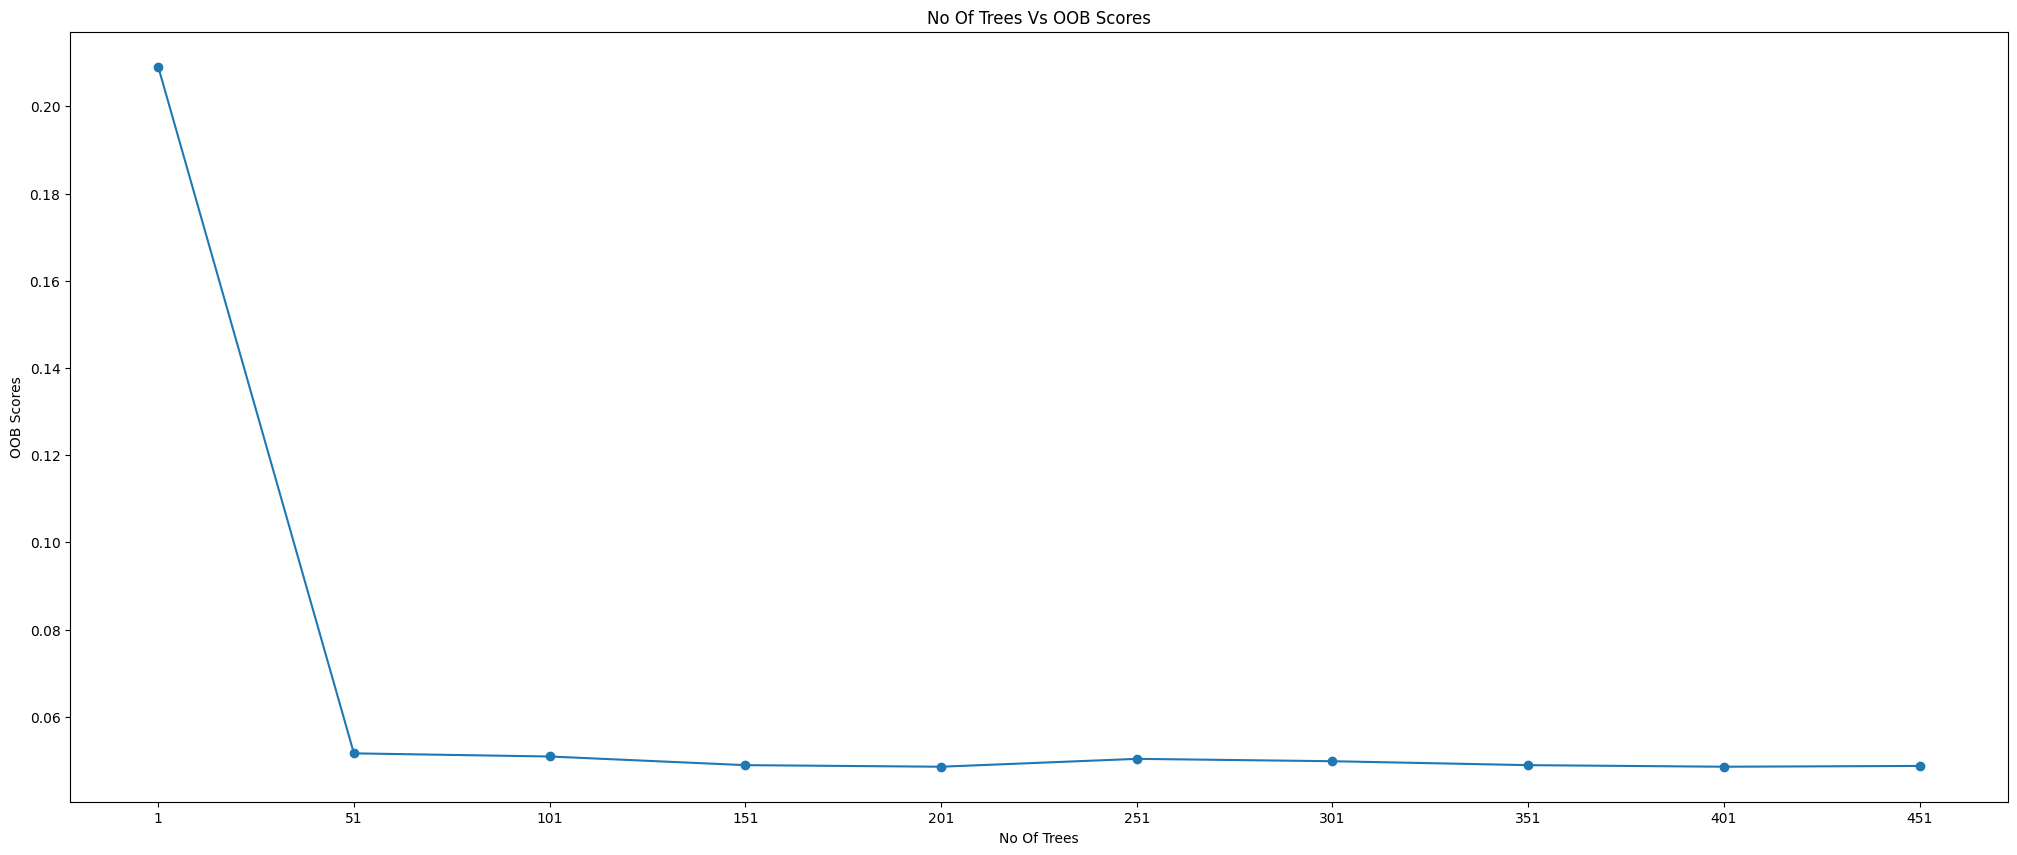

In [15]:
from sklearn.ensemble import ExtraTreesClassifier


extra_trees_scores ={}

extra_trees_model = ExtraTreesClassifier(oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1, bootstrap = True)

for n_estimators in [i for i in range(1,500,50)]:
  extra_trees_model.set_params(n_estimators = n_estimators )
  extra_trees_model.fit(X_train,y_train)
  oob_error = 1 - extra_trees_model.oob_score_
  extra_trees_scores[n_estimators] = oob_error

# Extract keys and values from the dictionary
extra_keys = list(extra_trees_scores.keys())
extra_values = list(extra_trees_scores.values())

plt.figure(figsize=(25, 10))
plt.xticks(extra_keys)

plt.plot(extra_keys, extra_values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('No Of Trees')
plt.ylabel('OOB Scores')
plt.title('No Of Trees Vs OOB Scores')





In [16]:
random_df = pd.DataFrame(random_values,index= random_keys, columns=["Random_Forest_Scores"] )
extra_df = pd.DataFrame(extra_values, index=extra_keys,columns=["Extra_Trees_Scores"])
extra_df

,Extra_Trees_Scores
1,0.209093
51,0.051597
101,0.050875
151,0.048890
201,0.048530
251,0.050334
301,0.049793
351,0.048890
401,0.048530
451,0.048710


In [17]:
oob_df = pd.concat([random_df,
                    extra_df], axis=1)

oob_df.head()

,Random_Forest_Scores,Extra_Trees_Scores
1,0.206026,0.209093
51,0.049071,0.051597
101,0.047086,0.050875
151,0.047628,0.048890
201,0.047267,0.048530


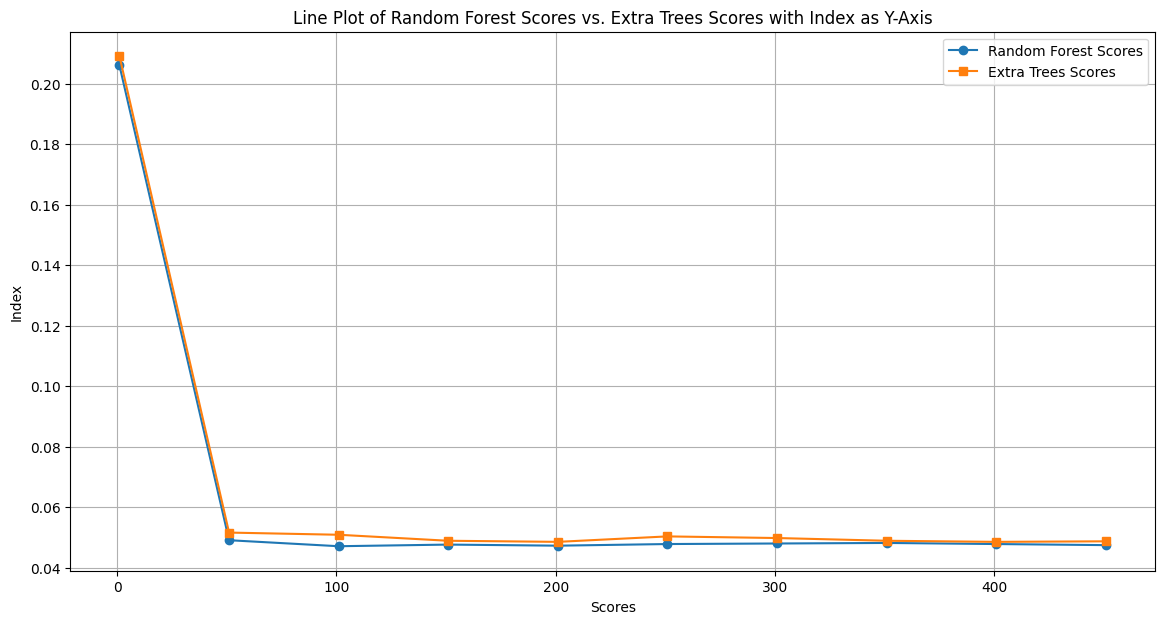

In [18]:
# Replace 'Random_Forest_Scores' and 'Extra_Trees_Scores' with the actual column names you want to plot
rf_scores = oob_df['Random_Forest_Scores']
et_scores = oob_df['Extra_Trees_Scores']

# Get the index (y-axis values) from the DataFrame
x = oob_df.index

# Create a line plot comparing the two columns
plt.figure(figsize=(14, 7), linewidth=5)  # Adjust width and height as needed
plt.plot( x,rf_scores, label='Random Forest Scores', marker='o', )
plt.plot(x,et_scores,  label='Extra Trees Scores', marker='s')

# Adding labels and title
plt.xlabel('Scores')
plt.ylabel('Index')
plt.title('Line Plot of Random Forest Scores vs. Extra Trees Scores with Index as Y-Axis')

# Add a legend to distinguish the two lines
plt.legend()

# Show the plot
plt.grid(True)  # Add gridlines if desired
plt.show()





<h2 id="results">Part 5: Gathering Results</h2>

Here, we will:

*   Select one of the models that performs well and calculate error metrics and a confusion matrix on the test data set.
*   Given the distribution of the predicted class, which metric is most important? Which could be deceiving?


In [21]:
random_forest_pred = random_forest_model.predict(X_test)





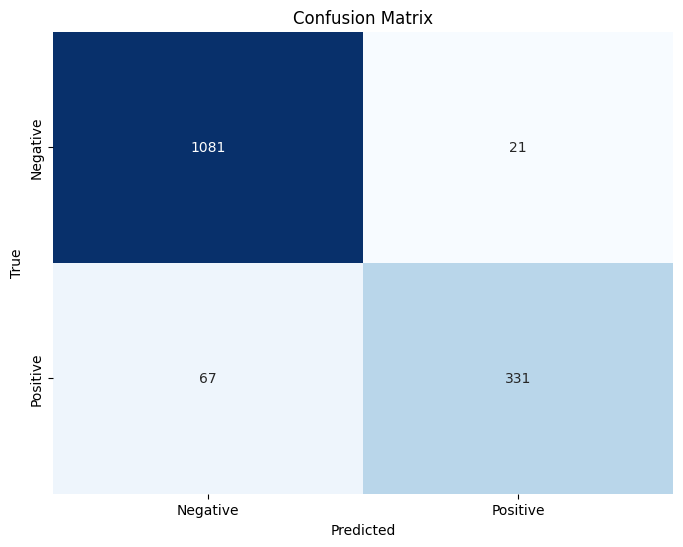

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, random_forest_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9413333333333334
Precision: 0.9403409090909091
Recall: 0.8316582914572864
F1 Score: 0.8826666666666666
ROC-AUC Score: 0.9063010150571368


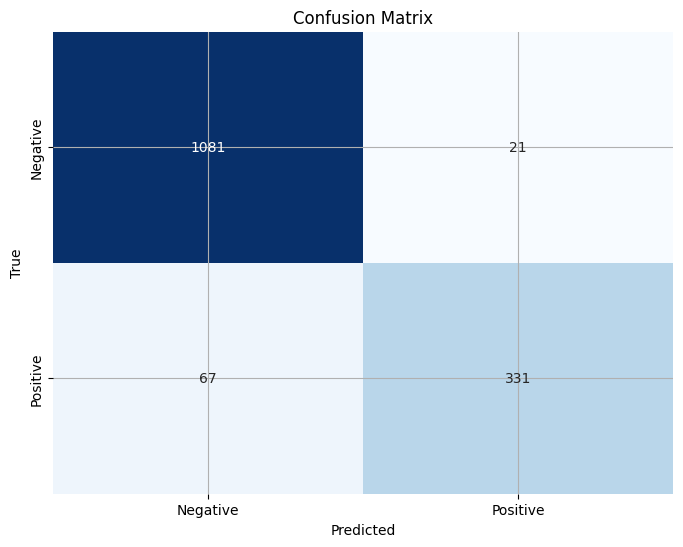

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1102
           1       0.94      0.83      0.88       398

    accuracy                           0.94      1500
   macro avg       0.94      0.91      0.92      1500
weighted avg       0.94      0.94      0.94      1500



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



# Calculate classification metrics
accuracy = accuracy_score(y_test, random_forest_pred)
precision = precision_score(y_test, random_forest_pred)
recall = recall_score(y_test, random_forest_pred)
f1 = f1_score(y_test, random_forest_pred)
roc_auc = roc_auc_score(y_test, random_forest_pred)
conf_matrix = confusion_matrix(y_test, random_forest_pred)
classification_rep = classification_report(y_test, random_forest_pred)

# Print the classification metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.grid(True)  # Add gridlines if desired
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_rep)

<h2 id="examineRes">Part 6: Examining Results</h2>

The following exercises will help us examine results:

*   Print or visualize the confusion matrix.
*   Plot the ROC-AUC and precision-recall curves.
*   Plot the feature importances.


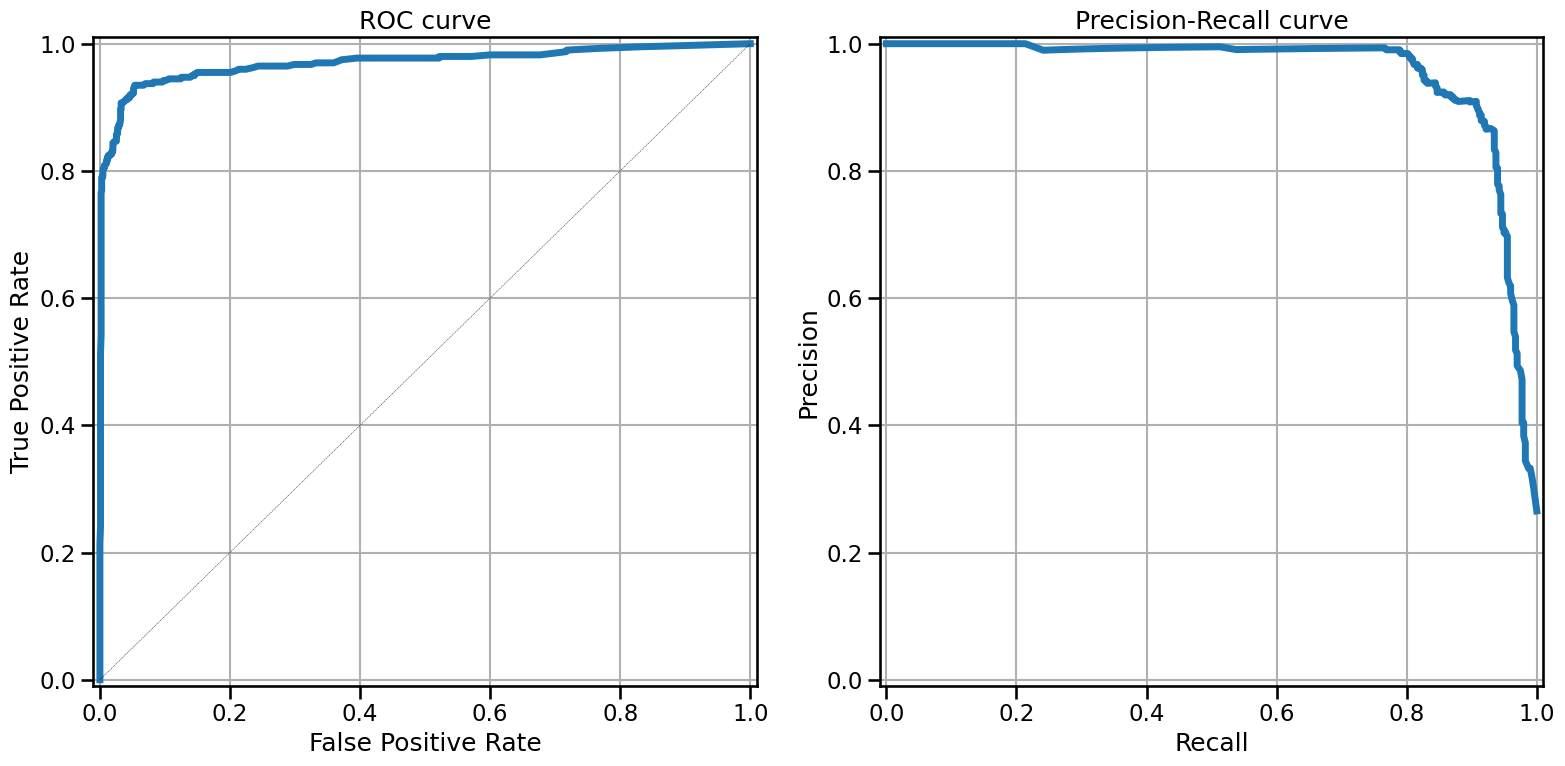

In [25]:
from sklearn.metrics import roc_curve, precision_recall_curve

sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = random_forest_model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

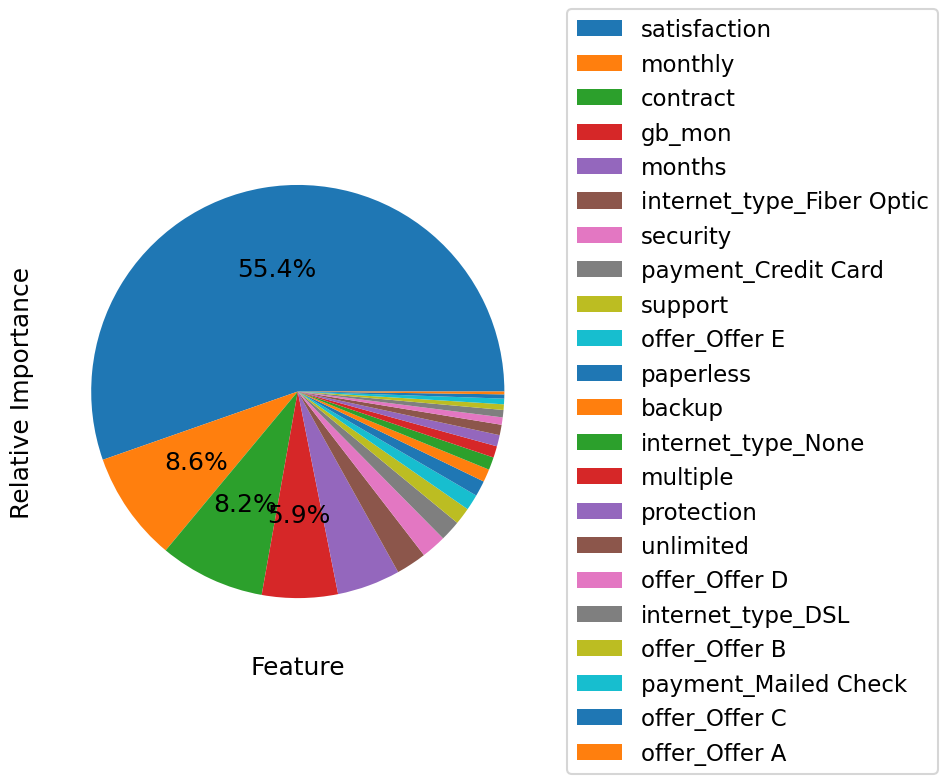

In [26]:
feature_imp = pd.Series(random_forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16, 6))
ax.pie(feature_imp, labels=None, autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 5.5 else '')
ax.set(ylabel='Relative Importance')
ax.set(xlabel='Feature')

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Move the legend outside the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels=feature_imp.index)

plt.show()